In [1]:
%matplotlib inline
import pandas as pd

# Create metadata

In [207]:
# Read survival data
fpath_index = "data/collab/2021-12-09_new_index/Index file.xlsx"
meta_index = pd.read_excel(fpath_index).iloc[:,[0,-1]]
meta_index.columns = ['Project_ID', 'survival1year']

# Read raw metadata
dl2seq = pd.read_csv("data/raw/downloadID2seqID.tsv", sep='\t', names=['Download_ID', 'seq_sample_id'])

fpath_metadata = "data/collab/P0064_Meta-data.xlsx"
meta_xue_vir = pd.read_excel(fpath_metadata, sheet_name="Virome")
meta_xue_atb = pd.read_excel(fpath_metadata, sheet_name="Antibiotics")
meta_xue_amp = pd.read_excel(fpath_metadata, sheet_name="16S_ITS")

# Rename columns
meta_xue_vir = meta_xue_vir[meta_xue_vir.Sample_ID!='BAX1'].copy()
meta_xue_vir = meta_xue_vir.merge(dl2seq, on='Download_ID', how='left')
meta_xue_vir.rename(columns={x:'vir_'+x for x in meta_xue_vir.columns if x!='Project_ID'}, inplace=True)
meta_xue_atb.rename(columns={x:'atb_'+x for x in meta_xue_atb.columns if x!='Project_ID'}, inplace=True)
meta_xue_amp.rename(columns={x:'amp_'+x for x in meta_xue_amp.columns if x!='Project_ID'}, inplace=True)

In [208]:
# Create new metadata
project_ids = list(set(meta_xue_vir.Project_ID.tolist() + meta_xue_atb.Project_ID.tolist() + meta_xue_amp.Project_ID.tolist()))
project_ids = [x for x in project_ids if str(x)!="nan"]
meta = pd.DataFrame(project_ids, columns=["Project_ID"])
meta = meta.merge(meta_xue_vir, on="Project_ID", how="left")
meta = meta.merge(meta_xue_atb, on="Project_ID", how="left")
meta = meta.merge(meta_xue_amp, on="Project_ID", how="left")
meta = meta.merge(meta_index, on="Project_ID", how="left")

In [200]:
meta['GvHD'] = meta.apply(lambda x:int(x['amp_GVHD']) if str(x['amp_GVHD'])!='nan' else int(x['vir_GvHD_0-No_1-mild_2-severe']), axis=1)

In [204]:
meta.to_csv("data/processed/metadata.tsv", sep="\t", index=False)

# CheckV

In [2]:
df = pd.read_csv("/Users/allen/tmp/quality_summary.tsv", sep='\t')

In [4]:
df.provirus.value_counts()

No     14473
Yes      455
Name: provirus, dtype: int64

In [5]:
df_virus = df[df.provirus=="No"]

<AxesSubplot:>

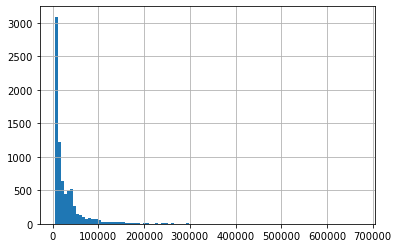

In [13]:
df_virus[df_virus.contig_length>5000]['contig_length'].hist(bins=100)

In [15]:
df_virus.checkv_quality.value_counts()

Not-determined    7074
Low-quality       4880
High-quality      1197
Medium-quality     934
Complete           388
Name: checkv_quality, dtype: int64

<AxesSubplot:>

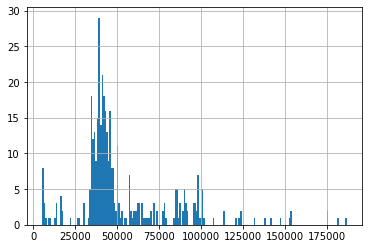

In [23]:
df_virus[df_virus.checkv_quality=="Complete"]['contig_length'].hist(bins=200)